In [10]:
# Uvoz pandas modula za manipulaciju nad podacima.
import pandas as pd
# Uvoz pyplot modula za vizuelizaciju podataka.
import matplotlib.pyplot as plt
# Uvoz seaborn modula za vizuelizaciju podataka.
import seaborn as sb
# Uvoz numpy modula za rad sa visedimenzionim nizovima.
import numpy as np
# Model stabla odlucivanja; vizuelizacija stabla;
# deljenje podataka na train/test set; enkodovanje kategorickih atributa;
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Uvoz modula za rad sa regularnim izrazima.
import re
# 1. PROBLEM STATEMENT AND DATA READING
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
# Bez ogranicenja za sirinu ispisa.
pd.set_option('display.width', None)
data = pd.read_csv('datasets/titanic_train.csv', delimiter=';')
# Dodavanje nove kolone na prvo mesto u DataFrame-u.
data.insert(loc=0, column='Passenger Id', value=np.arange(0, len(data), 1))
print(data.head())

   Passenger Id  survived  pclass  \
0             0         0       3   
1             1         1       1   
2             2         1       3   
3             3         1       1   
4             4         0       3   

                                                name     sex   age  sibsp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   parch            ticket    fare cabin embarked  
0      0         A/5 21171     725   NaN        S  
1      0          PC 17599  712833   C85        C  
2      0  STON/O2. 3101282    7925   NaN        S  
3      0            113803     531  C123        S  
4      0            373450     805   NaN        S  


In [11]:
# 2. DATA ANALYSIS
# Bazicne informacije o DataFrame-u.
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Passenger Id  891 non-null    int32  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   name          891 non-null    object 
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sibsp         891 non-null    int64  
 7   parch         891 non-null    int64  
 8   ticket        891 non-null    object 
 9   fare          891 non-null    int64  
 10  cabin         204 non-null    object 
 11  embarked      889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB
None


In [3]:
# Statistika numerickih atributa.
print(data.describe())


       Passenger Id
count    891.000000
mean     445.000000
std      257.353842
min        0.000000
25%      222.500000
50%      445.000000
75%      667.500000
max      890.000000


In [12]:
# Statistika kategorickih atributa.
print(data.describe(include=[object]))

# Prikaz top 5 kolona sa najvise podataka koji nedostaju.
total = data.isnull().sum().sort_values(ascending=False)
perc1 = data.isnull().sum() / data.isnull().count() * 100
perc2 = (round(perc1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, perc2], axis=1, keys=['Total', '%'])
print(missing_data.head(5))


                           name   sex  ticket    cabin embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644
              Total     %
cabin           687  77.1
age             177  19.9
embarked          2   0.2
Passenger Id      0   0.0
survived          0   0.0


In [6]:
# Statistika kategorickih atributa.
print(data.describe(include=[object]))
# Ispis:


       survived;pclass;name;sex;age;sibsp;parch;ticket;fare;cabin;embarked
count                                                 891                 
unique                                                891                 
top          Mr. Owen Harris;male;22;1;0;A/5 21171;725;;S                 
freq                                                    1                 


In [13]:
# Prikaz top 5 kolona sa najvise podataka koji nedostaju.
total = data.isnull().sum().sort_values(ascending=False)
perc1 = data.isnull().sum() / data.isnull().count() * 100
perc2 = (round(perc1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, perc2], axis=1, keys=['Total', '%'])
print(missing_data.head(5))
# Ispis:

              Total     %
cabin           687  77.1
age             177  19.9
embarked          2   0.2
Passenger Id      0   0.0
survived          0   0.0


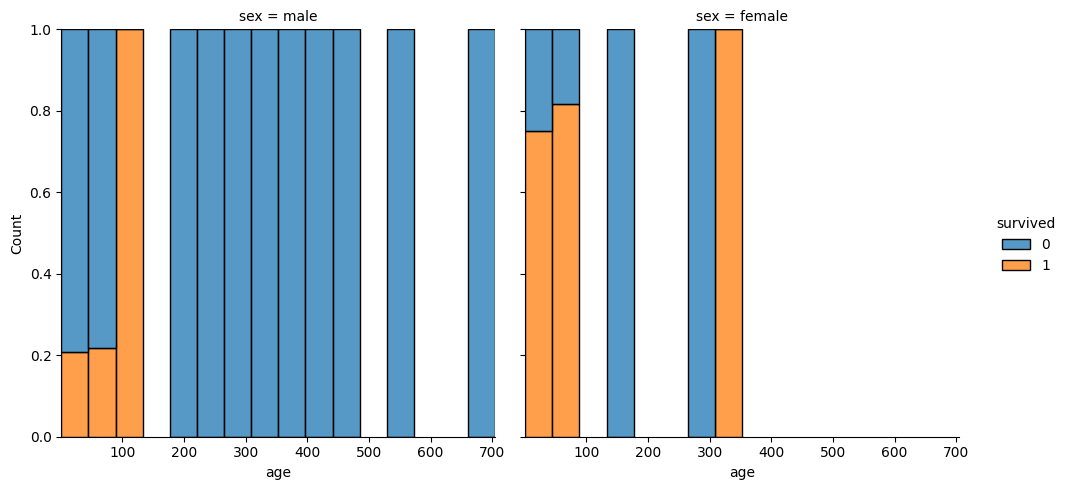

In [14]:
# Prikaz prezivelih po starosti i polu; godine grupisane u 16 grupa (bins).
# Parametar multiple moze biti: stack, layer, fill, dodge.
# Pol je atribut koji definitivno utice na ishod prezivljavanja.
sb.displot(data[data['age'].notna()], x='age', col='sex', hue='survived', 
hue_order=[0, 1], multiple='fill', bins=16)
plt.show()


C:\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


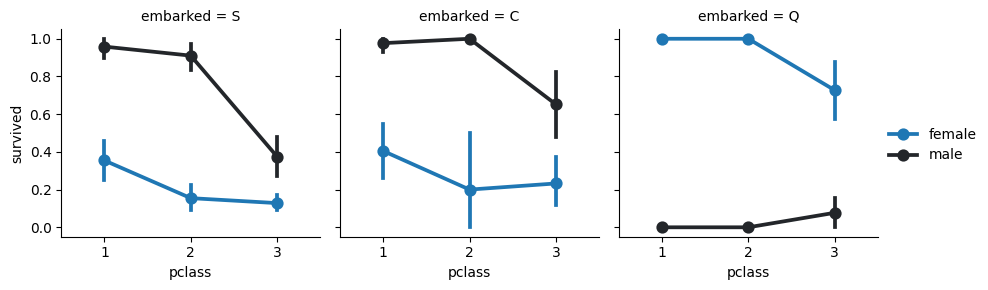

In [15]:
# Prikaz vise subplot-ova u okviru figure objekta. Subplot-ova ima koliko
# i razlicitih vrednosti u koloni col.
grid = sb.FacetGrid(data=data, col='embarked')
# Na x osi je pclass, na y osi survived, a prikazan je pol putnika (hue).
# Redosled prikaza kategorickih vrednosti nije bitan (None).
grid.map(sb.pointplot, 'pclass', 'survived', 'sex', 
order=None, hue_order=None)
grid.add_legend()
plt.show()


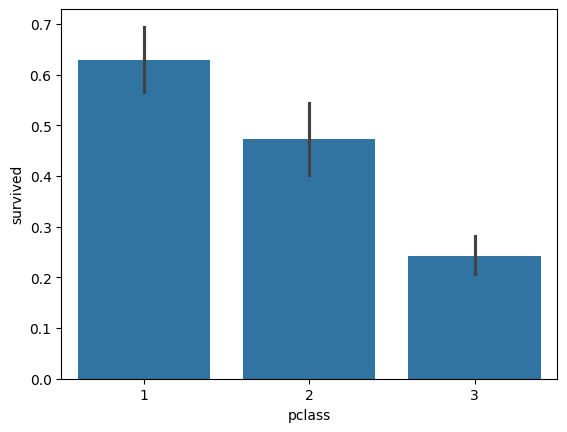

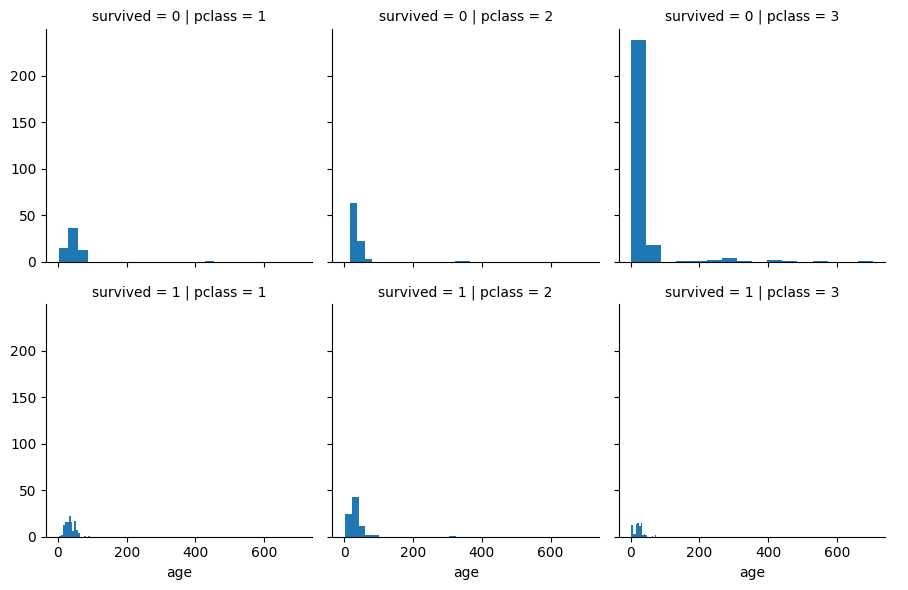

In [16]:
# Prikaz prezivelih po klasi putnika.
# Putnik vise klase ima vise sanse da prezivi.
plt.figure()
sb.barplot(x='pclass', y='survived', data=data)
# Brojcani prikaz godina putnika po klasi i prezivljavanju.
grid = sb.FacetGrid(data=data, col='pclass', row='survived')
grid.map(plt.hist, 'age', bins=16)
grid.add_legend()
plt.show()

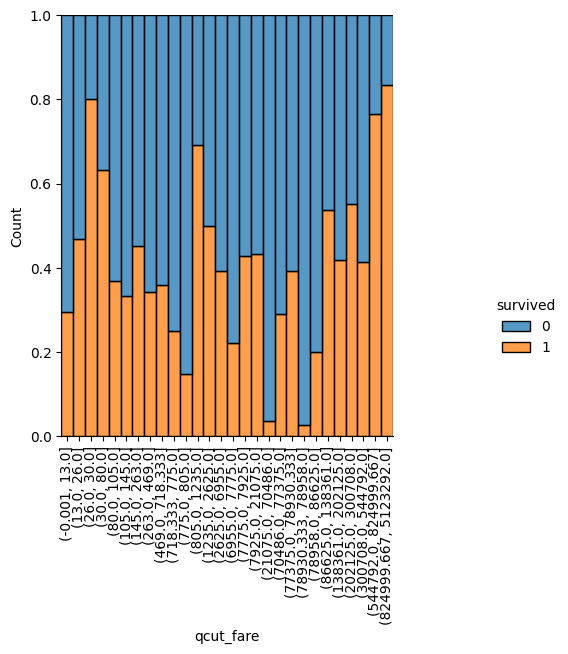

In [18]:
# Podela podataka iz kolone fare na 30 grupa podjednake velicine.
bins = 30
data['qcut_fare'] = pd.qcut(data['fare'], bins,duplicates='drop')
# Sortiranje DataFrame-a po koloni qcut_fare.
data = data.sort_values(by='qcut_fare')
# Konverzija vrednosti kolone qcut_fare (interval) u string.
data['qcut_fare'] = data['qcut_fare'].astype(str)
# Prikaz zavisnosti prezivljavanja od cene karte.
sb.displot(data, x='qcut_fare', hue='survived', hue_order=[0, 1],
multiple='fill', bins=bins)
plt.xticks(rotation=90)
plt.show()
data.drop(columns=['qcut_fare'], inplace=True)
# Jasno je da cena karte utice na ishod prezivljavanja.
# Poenta vizuelizacije je da nam ukaze kako grupisati vrednosti.

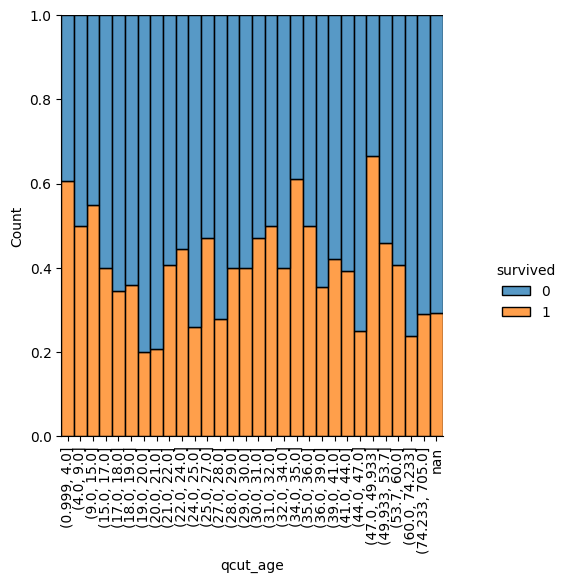

In [20]:
# Podela podataka iz kolone age na 30 grupa podjednake velicine.
#duplicates='drop' dodat da proradi
bins = 30
data['qcut_age'] = pd.qcut(data['age'], bins,duplicates='drop')
# Sortiranje DataFrame-a po koloni age.
data = data.sort_values(by='qcut_age')
# Konverzija vrednosti kolone age u string.
data['qcut_age'] = data['qcut_age'].astype(str)
# Prikaz zavisnosti prezivljavanja od starosti.
sb.displot(data, x='qcut_age', hue='survived', hue_order=[0, 1],
multiple='fill', bins=bins)
plt.xticks(rotation=90)
plt.show()
data.drop(columns=['qcut_age'], inplace=True)
# Sortirano kao i originalni DataFrame.
data = data.sort_values(by='Passenger Id')
# Kao i cena karte i starost utice na ishod prezivljavanja.
# Poenta vizuelizacije je da nam ukaze kako grupisati vrednosti.

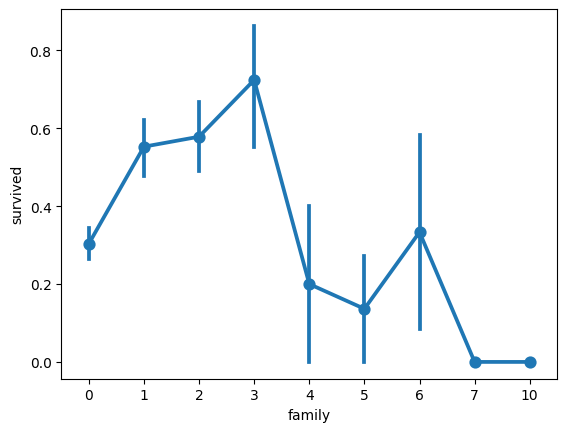

In [21]:
# Transformacija kolona sibsp i parch u jednu kolonu family.
# Vizuelizacija nam olaksava da identifikujemo grupe.
plt.figure()
data['family'] = data['sibsp'] + data['parch']
data = data.drop(columns=['sibsp', 'parch'])
sb.pointplot(x='family', y='survived', data=data)
plt.show()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'n']


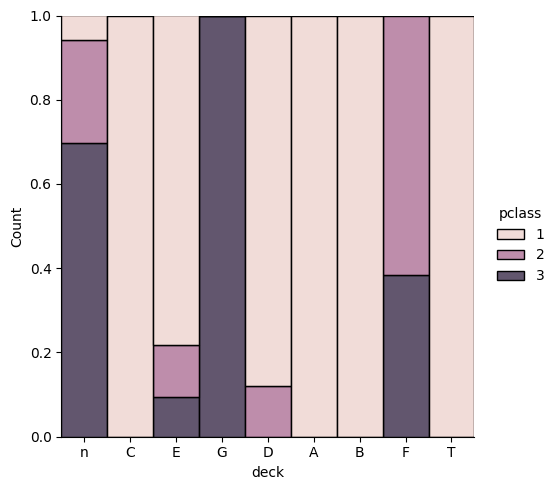

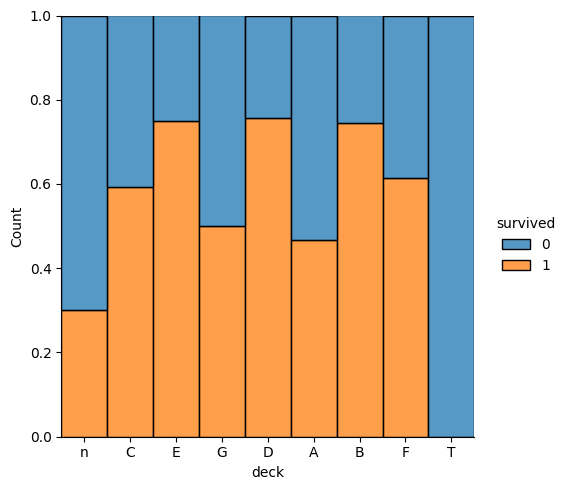

In [23]:
# 3. DATA CLEANSING
# Kolona cabin ima veoma mnogo vrednosti koje nedostaju (NaN).
# Iz tog razloga nije moguce popuniti nedostajuce vrednosti
# rezultatom neke funkcije (mean, mode, itd.). Medjutim, ne bi bilo dobro
# odbaciti tu kolonu u potpunosti, jer prvo slovo krije ime palube.
cabin = set(map(lambda val: str(val)[0], data['cabin'].unique()))
print(sorted(cabin))
# Ispis:
#['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'n’]
# Uvodjenje nove kolone deck i izbacivanje kolone cabin.
data['deck'] = data['cabin'].apply(lambda val: str(val)[0])
data = data.drop(columns=['cabin'])
# Prikaz zavisnosti klase od palube.
# A, B, C i T su 1. klasa, D i E su mesane, F i G su uglavnom 3. klasa.
# D i E imaju slicnu stopu prezivljavanja.
sb.displot(data, x='deck', hue='pclass', multiple='fill')
sb.displot(data, x='deck', hue='survived', multiple='fill')
plt.show()

In [25]:
# Pored kolone cabin, kolona age ima veci broj vrednosti koje nedostaju.
# Nedostajuce vrednosti bice popunjene vrednostima dobijenim
# grupisanjem po grupi g.
# Pored kolone cabin, kolona age ima veći broj vrednosti koje nedostaju.
# Nedostajuće vrednosti će biti popunjene vrednostima dobijenim
# grupisanjem po grupi g.
g = ['pclass', 'sex', 'deck', 'family']
data['age'] = data.groupby(by=g)['age'].transform(lambda c: c.fillna(c.mean()))
# Ako su i dalje neke vrednosti za age NaN (grupa po g sa svim NaN za age),
# vrednost za popunu je srednja vrednost kolone age.
data['age'] = data['age'].fillna(data['age'].mean())
# Kolona embarked ima samo 2 nedostajuće vrednosti
# pa će biti popunjena najčešće prisutnom vrednošću u koloni embarked.
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Passenger Id  891 non-null    int32  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   name          891 non-null    object 
 4   sex           891 non-null    object 
 5   age           891 non-null    float64
 6   ticket        891 non-null    object 
 7   fare          891 non-null    int64  
 8   embarked      891 non-null    object 
 9   family        891 non-null    int64  
 10  deck          891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 80.1+ KB
None
